# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building a **credit scoring** of a potential customer. A ** credit scoring ** is used to evaluate the ability of a potential borrower to repay their loan.

# Objectives

The objective of this project is to:
- Prepare a report for a bank's loan division by analyze a borrower's risk of defaulting.
- Apply Data Preprocessing to a real-life analytical case study.

<hr>

 # Table of contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#open_the_data">Open the data file and have a look at the general information</a></li>
        <li><a href="#data_preprocessing">Data preprocessing</a></li>
        <li><a href="#answer_questions">Answer these questions</a></li>
        <li><a href="#general_conclusion">General conclusion</a></li>
        <li><a href="#project_readiness_checklist">Project Readiness Checklist</a></li>
    </ol>
</div>
<br>
<hr>

<div id="open_the_data">
    <h2>Open the data file and have a look at the general information.</h2> 
</div>

We require the following libraries: *pandas* and *numpy* for data manipulation, *nlkt* for lemmatization, *seaborn* for visualization

In [922]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
import numpy as np

# import WordNet Lemmatizer for dealing with categorical variables
import nltk
from nltk.stem import WordNetLemmatizer

# import Snowball stemmer
from nltk.stem import SnowballStemmer

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 1)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [923]:
# read in the data
try:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')
except:
    df = pd.read_csv('credit_scoring_eng_eng.csv')
print('Data has been read correctly!')

Data has been read correctly!


In [924]:
# use the head() method to view the first 10 rows
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
5,0,-926.185831,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house
6,0,-2879.202052,43,bachelor's degree,0,married,0,F,business,0,38484.156,housing transactions
7,0,-152.779569,50,SECONDARY EDUCATION,1,married,0,M,employee,0,21731.829,education
8,2,-6929.865299,35,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,15337.093,having a wedding
9,0,-2188.756445,41,secondary education,1,married,0,M,employee,0,23108.150,purchase of the house for my family


In [925]:
# check the datatype with info() method
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [926]:
# check the structure of our dataset
df.shape

(21525, 12)

From the initial look at the data, we can see that `days_employed` and `total_income` has some missing data or 'NaNs'. We can see that the columns with missing values is of the float datatype. From the shape of the dataset, there are 21525 rows and 12 columns. 

### Conclusion

By initially looking at the dataset and general information about the data, we can get a picture of the structure of the data, the datatypes, number of rows and columns in the data. Now we proceed to determine the number of missing values and see what significance their absence is absence is for the dataset.  

<div id="data_preprocessing">
    <h2>Data preprocessing</h2> 
</div>

### Processing missing values

In [927]:
# print the number of missing values per column
df.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [928]:
# check for N/As
df.isnull().sum()/df.shape[0]

children            0.000000
days_employed       0.100999
dob_years           0.000000
education           0.000000
education_id        0.000000
family_status       0.000000
family_status_id    0.000000
gender              0.000000
income_type         0.000000
debt                0.000000
total_income        0.100999
purpose             0.000000
dtype: float64

In [929]:
# function to calculate the percentage of missing values
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [930]:
missing_values_table(df)

Your selected dataframe has 12 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
days_employed,2174,10.1
total_income,2174,10.1


From the above processing of missing values, we can see that about 10% of data on how long the customer has been working <em>"days_employed"</em> and monthly income <em>"total_income"</em> is missing. We need to decide whether the missing data is low enough for rows with missing data to be dropped or replacing the missing data with the mean or median is necessary. We proceed to determine whether the data has significant outliers by determining summary statistics for the rows with missing values.

In [931]:
# use describe() to check for outliers
print(df['days_employed'].describe())
print('The mean for days_employed is {:.2f} and median is {:.2f}'.format(df['days_employed'].mean(), df['days_employed'].median()))
print()
print(df['total_income'].describe())
print('The mean for total_income is {:.2f} and median is {:.2f}'.format(df['total_income'].mean(), df['total_income'].median()))
print()

# what if we get absolute value for day_employed, check for outliers  
days_employed_absolute = abs(df['days_employed'])
print(days_employed_absolute.describe())
print('Taking the absolute value for days_employed gives a mean of {:.2f} and median of {:.2f}'.format(days_employed_absolute.mean(), days_employed_absolute.median()))


count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64
The mean for days_employed is 63046.50 and median is -1203.37

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64
The mean for total_income is 26787.57 and median is 23202.87

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64
Taking the absolute value for days_employed gives a mean of 66914.73 and median of 2194.22


From the `describe()` method, for the column `days_employed`, the mean is 63046 and the median is -1203.36. This means that the dataset contains significant outliers. For the column `total_income`, the mean is 26787 and the median is 23202. We could likely replace missing values in this column with the mean or median. Checking through the missing values, we observe that the missing values exhibit a 'systematic' pattern. For each rows with missing data, the `days_employed` and `total_income` values are all missing. This means the data is "Missing not at random (MNAR)". That means those who refused to give information about the days employed will likely not give information about their total income. A quick check on using the absolute values in the `days_employed` column gives a mean of 66914 and a median of 2194. With this result, and high standard deviation, the best option would be to drop those rows with missing value to avoid introducing "variance" or "bias" into our analysis. Moreover, since the sample size is large enough, we can drop the 10% of the missing data without substantial loss of statistical power.

In [932]:
# count of missing data by gender
print('Count of missing days employed by gender')
print(df[df['days_employed'].isnull()]['gender'].value_counts())

print()
print('Count of total income missing by gender')
print(df[df['total_income'].isnull()]['gender'].value_counts())

Count of missing days employed by gender
F    1484
M     690
Name: gender, dtype: int64

Count of total income missing by gender
F    1484
M     690
Name: gender, dtype: int64


The count of missing data by gender shows that the data is missing not at random. i.e. same number of both gender are missing in the `days_employed` and `total_income` columns.

In [933]:
# count of missing data by income type
print('Count of missing days employed by income type')
print(df[df['days_employed'].isnull()]['income_type'].value_counts())

Count of missing days employed by income type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64


In [934]:
# dropping rows with missing values
credit_score_df = df.dropna().reset_index(drop=True)

In [935]:
# check to see if missing data still exist after dropping rows
missing_values_table(credit_score_df)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [936]:
# check new dataframe info
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19351 entries, 0 to 19350
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null float64
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null float64
purpose             19351 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


After dropping 'Nans' from the rows, we then proceed to check for unique entry of data in each column. This way, we can know at a glance which columns to fix when processing for duplicates.

In [937]:
# check for unique entry in the 'children' column
credit_score_df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [938]:
# check for unique entry in the 'day_employed' column
credit_score_df['days_employed'].unique()

array([-8437.67302776, -4024.80375385, -5623.42261023, ...,
       -2113.3468877 , -3112.4817052 , -1984.50758853])

In [939]:
# check for unique entry in the 'education' column
credit_score_df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [940]:
# check for unique enrty in the 'education_id' column
credit_score_df['education_id'].unique()

array([0, 1, 2, 3, 4])

In [941]:
# check for unique entry in the 'family_status' column
credit_score_df['family_status'].unique()

array(['married', 'civil partnership', 'widow / widower', 'divorced',
       'unmarried'], dtype=object)

In [942]:
# check for unique entry in the 'family_status_id' column
credit_score_df['family_status_id'].unique()

array([0, 1, 2, 3, 4])

In [943]:
# check for unique entry in the 'gender' column
credit_score_df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

In [944]:
# check for unique entry in the 'income_type' column
credit_score_df['income_type'].unique()

array(['employee', 'retiree', 'business', 'civil servant', 'unemployed',
       'student', 'entrepreneur', 'paternity / maternity leave'],
      dtype=object)

In [945]:
# check for unique entry in the 'debt' column
credit_score_df['debt'].unique()

array([0, 1])

In [946]:
# check for unique entry in the 'total_income' column
credit_score_df['total_income'].unique()

array([40620.102, 17932.802, 23341.752, ..., 14347.61 , 39054.888,
       13127.587])

In [947]:
# check for unique entry in the 'purpose' column
credit_score_df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'housing', 'transactions with my real estate', 'cars',
       'to become educated', 'getting an education',
       'second-hand car purchase', 'car', 'wedding ceremony',
       'to get a supplementary education', 'purchase of my own house',
       'real estate transactions', 'getting higher education',
       'to own a car', 'purchase of a car', 'profile education',
       'university education', 'buying property for renting out',
       'to buy a car', 'building a real estate', 'housing renovation',
       'going

### Conclusion

From the Data Preprocessing section, we computed the number of missing values per column and the percentage of missing values per column. We can see that 10% of rows are missing `days_employed` and `total_income`. Since the type of data with missing values are quantitative, and the data are "Missing not at random", we proceed to drop those rows with missing values. We drop missing rows because 10% of missing values would not really skew our analysis. We also checked for uniqueness in our dataset. We found out that:
- `children` has a negative value of -1 so we have to deal with it 
- `days_employed` have negative value of days. We have to take the absolute value for our analysis to be accurate
- `education` has duplicate data
- `gender` has an 'XNA' entry. Since there is no logical way to decide whether that entry is for a male or female, we would have to drop that row.

### Data type replacement

After dropping rows, we still observe that the `days_employed` and `total_income` are of float datatype. We need to replace data type and convert from 'float' to 'int'.

In [948]:
# change float to int in days_employed column
credit_score_df['days_employed'] = credit_score_df['days_employed'].astype('int')

# change float to int in total_income column
credit_score_df['total_income'] = credit_score_df['total_income'].astype('int')

credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19351 entries, 0 to 19350
Data columns (total 12 columns):
children            19351 non-null int64
days_employed       19351 non-null int64
dob_years           19351 non-null int64
education           19351 non-null object
education_id        19351 non-null int64
family_status       19351 non-null object
family_status_id    19351 non-null int64
gender              19351 non-null object
income_type         19351 non-null object
debt                19351 non-null int64
total_income        19351 non-null int64
purpose             19351 non-null object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


### Conclusion

We are able to change the `days_employed` and `total_income` from floating point value to integer datatype by using the `astype()` method and the `('int')` argument.

### Processing duplicates

In [949]:
# convert rows with '-1' values for children to '0'
credit_score_df.loc[credit_score_df['children'] == -1, 'children'] = 0

# check values after convertion
credit_score_df['children'].value_counts()

0     12754
1      4343
2      1851
3       294
20       67
4        34
5         8
Name: children, dtype: int64

In [950]:
# locate index of 'gender' row with 'XNA'
i = credit_score_df[(credit_score_df['gender'] == 'XNA')].index

# drop row in 'gender' column with 'XNA'
credit_score_df = credit_score_df.drop(i)
print('Unique gender are:', credit_score_df['gender'].unique())
print()
print('New dataframe shape is:', credit_score_df.shape)

Unique gender are: ['F' 'M']

New dataframe shape is: (19350, 12)


In [951]:
# convert negative 'days_employed' to positive values
credit_score_df['days_employed'] = abs(credit_score_df['days_employed'])
credit_score_df['days_employed']

0          8437
1          4024
2          5623
3          4124
4        340266
          ...  
19346      4529
19347    343937
19348      2113
19349      3112
19350      1984
Name: days_employed, Length: 19350, dtype: int64

In [952]:
# check for duplicates
credit_score_df['education'].value_counts().sort_values(ascending=False)

secondary education    12342
bachelor's degree       4222
SECONDARY EDUCATION      705
Secondary Education      646
some college             612
BACHELOR'S DEGREE        251
Bachelor's Degree        243
primary education        231
Some College              40
SOME COLLEGE              22
PRIMARY EDUCATION         16
Primary Education         14
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

In [953]:
# processing duplicates in 'education' column
credit_score_df['education'] = credit_score_df['education'].str.lower()
credit_score_df['education'].value_counts().sort_values(ascending=False)

secondary education    13693
bachelor's degree       4716
some college             674
primary education        261
graduate degree            6
Name: education, dtype: int64

In [954]:
# check updated table
credit_score_df['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [955]:
# checking frequency of words in 'purpose' column
allwords = ' '.join(credit_score_df['purpose'])
allwords = allwords.lower()

wordnet_lemma = WordNetLemmatizer()

# change allwords to a list or words
allwords = nltk.word_tokenize(allwords)

# find and save the lemma of each word
lemmas = [wordnet_lemma.lemmatize(w, pos = 'n') for w in allwords]

# print lemmas
#print(lemmas)

from collections import Counter

# print the frequency of each lemma
print(Counter(lemmas))

Counter({'a': 4631, 'real': 4029, 'estate': 4029, 'car': 3897, 'purchase': 3002, 'education': 2800, 'to': 2756, 'of': 2708, 'transaction': 2334, 'property': 2281, 'my': 2155, 'buy': 2136, 'wedding': 2099, 'own': 2014, 'house': 1739, 'housing': 1708, 'buying': 1477, 'commercial': 1178, 'the': 1165, 'for': 1158, 'building': 1141, 'with': 1140, 'second-hand': 872, 'university': 853, 'supplementary': 810, 'getting': 783, 'ceremony': 721, 'have': 693, 'having': 685, 'renting': 588, 'out': 588, 'family': 570, 'construction': 560, 'residential': 546, 'renovation': 542, 'going': 440, 'get': 396, 'an': 393, 'higher': 390, 'profile': 389, 'become': 357, 'educated': 357})


### Conclusion

As we have observed, the duplicate data in the `education` column may have occured when more than one analysts is involved in data collection and entry. One analyst prefers to write item names using **ALL CAPS**, another uses maybe **Lower case**. We have been able to process the duplicates in the `education` column by using `str.lower()` method in pandas. We also carried out lemmatization on the `purpose` column.

### Categorizing Data

In [956]:
credit_score_df['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'housing', 'transactions with my real estate', 'cars',
       'to become educated', 'getting an education',
       'second-hand car purchase', 'car', 'wedding ceremony',
       'to get a supplementary education', 'purchase of my own house',
       'real estate transactions', 'getting higher education',
       'to own a car', 'purchase of a car', 'profile education',
       'university education', 'buying property for renting out',
       'to buy a car', 'building a real estate', 'housing renovation',
       'going

In [957]:
# replace words with 'education'
credit_score_df['purpose'] = credit_score_df['purpose'].replace(['supplementary education', 'university education', 
                                                                 'education', 'to get a supplementary education', 
                                                                 'getting an education', 'getting higher education',
                                                                 'profile education', 'to become educated',
                                                                 'going to university'], 'education')



In [958]:
# pass the stemmer the value 'english' so that it's tuned for working with English
english_stemmer = SnowballStemmer('english')

# cast all words in the 'purpose' column to a list
allwords = credit_score_df['purpose'].to_list()

stemmed_word = ['wedding', 'real estate', 'property', 'hous', 'car', 'educ']

purpose_categorize = []

for word in allwords:
    for stems in stemmed_word:
        if stems in word:
            purpose_categorize.append(stems)
            continue
                    

from pandas import DataFrame
purpose_categorize_df = DataFrame(purpose_categorize, columns=['purpose_categorized'])   

#pd.reset_option('max_rows', None) # set maximum viewing of column
#pd.reset_option('max_rows') # reset or go back to default view
#purpose_categorize_df

In [959]:
# add new category to dataframe
purpose_categorize_df['purpose_categorized'] = purpose_categorize_df['purpose_categorized'].replace('hous', 'house purchase')
purpose_categorize_df['purpose_categorized'] = purpose_categorize_df['purpose_categorized'].replace('educ', 'education')
purpose_categorize_df['purpose_categorized'] = purpose_categorize_df['purpose_categorized'].replace('car', 'car purchase')

print(purpose_categorize_df['purpose_categorized'])
print()
print(purpose_categorize_df['purpose_categorized'].describe())   

0        house purchase
1          car purchase
2        house purchase
3             education
4               wedding
              ...      
19345    house purchase
19346      car purchase
19347          property
19348      car purchase
19349      car purchase
Name: purpose_categorized, Length: 19350, dtype: object

count           19350
unique              6
top       real estate
freq             4029
Name: purpose_categorized, dtype: object


In [960]:
credit_score_df['purpose_categorized'] = purpose_categorize_df.reset_index(drop=True)
print(credit_score_df.head(10))

   children  days_employed  dob_years            education  education_id  \
0         1           8437         42    bachelor's degree             0   
1         1           4024         36  secondary education             1   
2         0           5623         33  secondary education             1   
3         3           4124         32  secondary education             1   
4         0         340266         53  secondary education             1   
5         0            926         27    bachelor's degree             0   
6         0           2879         43    bachelor's degree             0   
7         0            152         50  secondary education             1   
8         2           6929         35    bachelor's degree             0   
9         0           2188         41  secondary education             1   

       family_status  family_status_id gender income_type  debt  total_income  \
0            married                 0      F    employee     0         40620   
1

In [962]:
#credit_score_df = credit_score_df.reset_index(drop=True)
#credit_score_df['purpose_categorized'] = credit_score_df['purpose_categorized'].to_frame().reset_index()
#credit_score_df['purpose_categorized'].info()

purpose_categorize_df.info()
print()
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19350 entries, 0 to 19349
Data columns (total 1 columns):
purpose_categorized    19350 non-null object
dtypes: object(1)
memory usage: 151.3+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19350 entries, 0 to 19350
Data columns (total 13 columns):
children               19350 non-null int64
days_employed          19350 non-null int64
dob_years              19350 non-null int64
education              19350 non-null object
education_id           19350 non-null int64
family_status          19350 non-null object
family_status_id       19350 non-null int64
gender                 19350 non-null object
income_type            19350 non-null object
debt                   19350 non-null int64
total_income           19350 non-null int64
purpose                19350 non-null object
purpose_categorized    19349 non-null object
dtypes: int64(7), object(6)
memory usage: 2.1+ MB


We can now try to encode categorical data to numeric quantities by simply replacing values. 

In [963]:
print(credit_score_df['education'].value_counts())   

secondary education    13693
bachelor's degree       4716
some college             674
primary education        261
graduate degree            6
Name: education, dtype: int64


In [976]:
# we create a copy of the dataframe to use for encoding
credit_score_df_encode = credit_score_df.copy()

In [977]:
# encoding 'education' column
education_encode = {'education':{'graduate degree': 1, "bachelor's degree": 2, 'some college': 3,
                            'secondary education': 4, 'primary education': 5}}
print(education_encode)
credit_score_df_encode.replace(education_encode, inplace =True)

{'education': {'graduate degree': 1, "bachelor's degree": 2, 'some college': 3, 'secondary education': 4, 'primary education': 5}}


In [978]:
# encoding 'family_status' column
labels = credit_score_df_encode['family_status'].astype('category').cat.categories.tolist()
family_status_encode = {'family_status' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(family_status_encode)
credit_score_df_encode.replace(family_status_encode, inplace =True)

{'family_status': {'civil partnership': 1, 'divorced': 2, 'married': 3, 'unmarried': 4, 'widow / widower': 5}}


In [979]:
# encoding 'income_type' column
labels = credit_score_df_encode['income_type'].astype('category').cat.categories.tolist()
income_type_encode = {'income_type' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(income_type_encode)
credit_score_df_encode.replace(income_type_encode, inplace =True)

{'income_type': {'business': 1, 'civil servant': 2, 'employee': 3, 'entrepreneur': 4, 'paternity / maternity leave': 5, 'retiree': 6, 'student': 7, 'unemployed': 8}}


In [980]:
# encoding 'purpose_categorized' column
labels = credit_score_df_encode['purpose_categorized'].astype('category').cat.categories.tolist()
purpose_categorized_encode = {'purpose_categorized' : {k: v for k,v in zip(labels, list(range(1, len(labels)+1)))}}

print(purpose_categorized_encode)
credit_score_df_encode.replace(purpose_categorized_encode, inplace =True)

#credit_score_df_encode['purpose_categorized'] = credit_score_df_encode['purpose_categorized'].astype('int')

{'purpose_categorized': {'car purchase': 1, 'education': 2, 'house purchase': 3, 'property': 4, 'real estate': 5, 'wedding': 6}}


In [981]:
# show all categories with encoding
print(credit_score_df_encode.head(10))

   children  days_employed  dob_years  education  education_id  family_status  \
0         1           8437         42          2             0              3   
1         1           4024         36          4             1              3   
2         0           5623         33          4             1              3   
3         3           4124         32          4             1              3   
4         0         340266         53          4             1              1   
5         0            926         27          2             0              1   
6         0           2879         43          2             0              3   
7         0            152         50          4             1              3   
8         2           6929         35          2             0              1   
9         0           2188         41          4             1              3   

   family_status_id gender  income_type  debt  total_income  \
0                 0      F            3     0

### Conclusion

We have been able to categorize the data after stemming and doing lemmatization. We also encode categorical variables. This will be useful for future analysis.

<div id="answer_questions">
    <h2>Answer these questions</h2> 
</div>

- Is there a relation between having kids and repaying a loan on time?

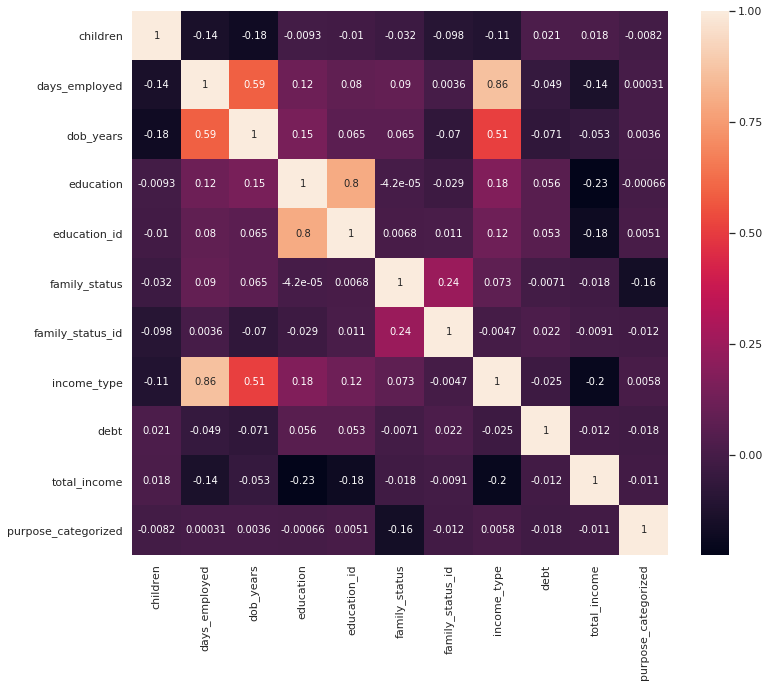

In [982]:
# correlation matrix 
from IPython.core.pylabtools import figsize
figsize(12, 10)

corrMatrix = credit_score_df_encode.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()


In [ ]:
# children vs debt

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


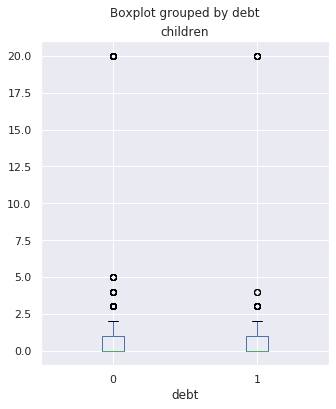

In [640]:
credit_score_df.boxplot('children', 'debt', figsize = (5,6))

### Conclusion

- Is there a relation between marital status and repaying a loan on time?

In [ ]:
# family status vs debt

TypeError: unsupported operand type(s) for /: 'str' and 'int'

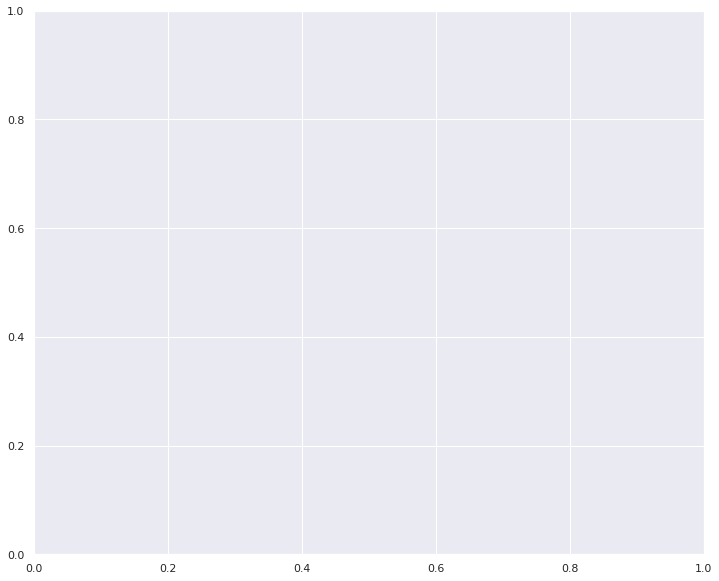

In [705]:
credit_score_df.boxplot('family_status', 'debt')

### Conclusion

- Is there a relation between income level and repaying a loan on time?

In [ ]:
# total income vs debt

### Conclusion

- How do different loan purposes affect on-time repayment of the loan?

In [ ]:
# purchase categorized vs debt

TypeError: unsupported operand type(s) for /: 'str' and 'int'

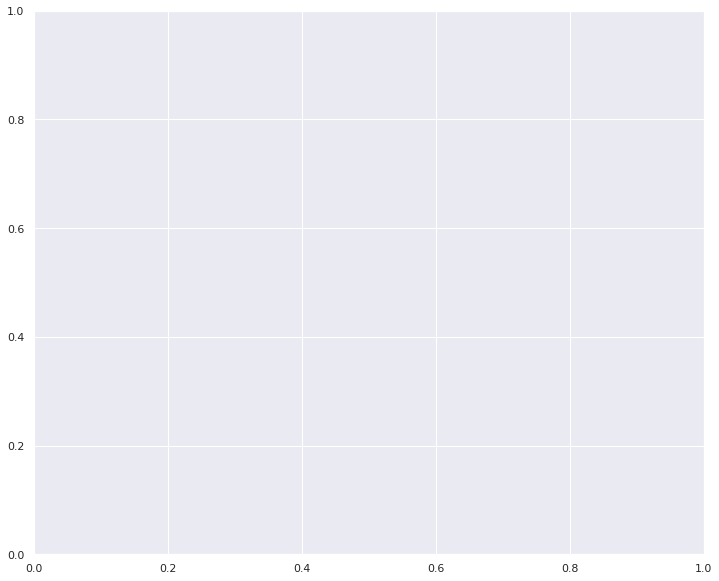

In [644]:
credit_score_df.boxplot('purpose_categorized', 'debt')

### Conclusion

<div id="general_conclusion">
    <h2>General conclusion</h2> 
</div>

<div id="project_readiness_checklist">
    <h2>Project Readiness Checklist</h2> 
</div>

Put 'x' in the completed points. Then press Shift + Enter.

- [x]  file open;
- [ ]  file examined;
- [ ]  missing values defined;
- [ ]  missing values are filled;
- [ ]  an explanation of which missing value types were detected;
- [ ]  explanation for the possible causes of missing values;
- [ ]  an explanation of how the blanks are filled;
- [ ]  replaced the real data type with an integer;
- [ ]  an explanation of which method is used to change the data type and why;
- [ ]  duplicates deleted;
- [ ]  an explanation of which method is used to find and remove duplicates;
- [ ]  description of the possible reasons for the appearance of duplicates in the data;
- [ ]  data is categorized;
- [ ]  an explanation of the principle of data categorization;
- [ ]  an answer to the question "Is there a relation between having kids and repaying a loan on time?";
- [ ]  an answer to the question " Is there a relation between marital status and repaying a loan on time?";
- [ ]   an answer to the question " Is there a relation between income level and repaying a loan on time?";
- [ ]  an answer to the question " How do different loan purposes affect on-time repayment of the loan?"
- [ ]  conclusions are present on each stage;
- [ ]  a general conclusion is made.